In [154]:
import pandas as pd

dados = pd.read_csv("Advertising.csv")
dados.drop(columns='Unnamed: 0', inplace=True)

print("Preview de dados")
print(dados.head())


print("\nSummary de Dados \n")
dados.describe()


Preview de dados
      TV  radio  newspaper  sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3    9.3
3  151.5   41.3       58.5   18.5
4  180.8   10.8       58.4   12.9

Summary de Dados 



,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


Estatísticas Descritivas

TV: A média de gastos é de aproximadamente 147 mil dólares, com valores variando de 0.7 a 296.4 mil dólares.

radio: A média é de 23.26 mil dólares, variando de 0 a 49.6 mil dólares.

newspaper: A média é de 30.55 mil dólares, com uma gama mais ampla de variação até 114 mil dólares.

sales: A média de vendas é de 14.02 mil dólares, com um mínimo de 1.6 e um máximo de 27 mil dólares.


In [155]:
correlation_matrix = dados.corr()
print("\n Matriz correlativa\n")
print(correlation_matrix)


 Matriz correlativa

                 TV     radio  newspaper     sales
TV         1.000000  0.054809   0.056648  0.782224
radio      0.054809  1.000000   0.354104  0.576223
newspaper  0.056648  0.354104   1.000000  0.228299
sales      0.782224  0.576223   0.228299  1.000000


Matriz de Correlação

TV e Vendas: Alta correlação positiva (r≈0.782), indicando que o aumento nos gastos com TV geralmente está associado a um aumento nas vendas.

Rádio e Vendas: Correlação moderada positiva (r≈0.576).

Jornal e Vendas: Correlação mais fraca (r≈0.228), sugerindo que o jornal tem um impacto menor sobre as vendas comparado com TV e rádio.

In [156]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Separando os dados em features e target
X = dados[['TV']]  # Usando apenas o canal de TV para simplificar
y = dados['sales']

# Dividindo os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.7 ,test_size=0.3, random_state=100)

#print("x_train",X_train)
#print("y_train",y_train)
#print("x_test",X_test)
#print("y_test",y_test)


# Criando e treinando o modelo de regressão linear
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Coeficientes do modelo
intercept = linear_model.intercept_
slope = linear_model.coef_[0]

# Previsões
y_pred = linear_model.predict(X_test)

print("Intercept: ",intercept)
print("\nSlope: ",slope)
print("\ny_predict: ",y_pred)
print("\n\n")
# Calculando erros
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error: ",mae)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("RMSE: ",rmse)


Intercept:  6.98966585741168

Slope:  0.04649735874786576

y_predict:  [ 7.35234526 18.06533671 13.27610876 17.11214086 18.22807747 16.60531965
 13.4620982  16.17754395 17.05169429 17.07029323 12.4391563  17.66080969
  9.60281742 15.72186983 11.04423554 11.36971705 13.95032046 14.90351632
 14.59198401 12.23921766 16.97264878 13.00642408 16.07524976 15.21969836
 15.58702749 17.23303399 17.20978531 10.49091697 15.58702749 12.71349072
 10.1700852  10.19798361 12.61584627 15.74976825  9.31453379 12.59259759
 11.50920913 14.81982107 17.33067844 15.97295557 17.00519693 15.15925179
 14.63848137 17.14933874 12.57864838 11.16047894  7.77547122 18.55820871
 10.27237939  8.76586496 16.405381   14.95466341 10.4816175  13.08546959
 16.78665935  9.05879832  7.78942043  8.17999824 16.17754395 10.9744895 ]



Mean Absolute Error:  2.161984932672072
RMSE:  2.8241456288327007


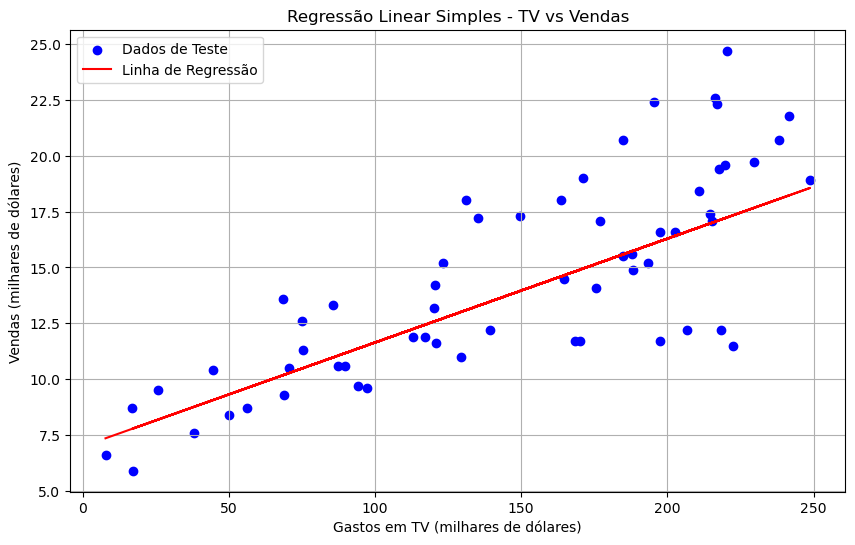

In [157]:
import matplotlib.pyplot as plt
import numpy as np

# Criando um diagrama de dispersão com a reta de regressão
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Dados de Teste')
plt.plot(X_test, y_pred, color='red', label='Linha de Regressão')
plt.title('Regressão Linear Simples - TV vs Vendas')
plt.xlabel('Gastos em TV (milhares de dólares)')
plt.ylabel('Vendas (milhares de dólares)')
plt.legend()
plt.grid(True)
plt.show()


In [158]:
# Usando todas as variáveis de entrada
X_multi = dados[['TV', 'radio', 'newspaper']]
y_multi = dados['sales']

# Dividindo os dados em treino e teste para o modelo múltiplo
X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(X_multi, y_multi,train_size=0.7, test_size=0.3, random_state=100)

# Criando e treinando o modelo de regressão linear múltipla
multi_linear_model = LinearRegression()
multi_linear_model.fit(X_train_multi, y_train_multi)


# Coeficientes do modelo múltiplo
intercept_multi = multi_linear_model.intercept_
print("Intercept Multiplo",intercept_multi)
coefficients_multi = multi_linear_model.coef_
print("\nCoeficientes Multiplo",coefficients_multi)

# Previsões para o conjunto de teste
y_pred_multi = multi_linear_model.predict(X_test_multi)
print("\ny_pred_multi",y_pred_multi)

# Calculando erros para o modelo múltiplo
mae_multi = mean_absolute_error(y_test_multi, y_pred_multi)
print("\nMean Absolute Error: ",mae_multi)
rmse_multi = mean_squared_error(y_test_multi, y_pred_multi, squared=False)
print("\nRMSE: ",rmse_multi)


Intercept Multiplo 2.652789668879496

Coeficientes Multiplo [0.0454256  0.18975773 0.00460308]

y_pred_multi [10.62160072 20.00625302 16.91850882 19.17040746 20.94974131 13.12284284
 11.80740696 12.32019766 20.57806782 20.95662688 10.79096475 19.54868702
  6.42403866 15.23133391  8.97226257  7.89897862 16.23599497 12.02636477
 17.09702178 11.26080277 16.97826292  9.75655721 20.82389762 17.20916742
 15.13816239 21.97290698 19.20181841 10.07501899 19.39017185 14.8673761
 14.36798893  7.55604543  9.96742165 14.76342565  7.20995576 13.60003295
  7.49088656 11.70865932 13.46091883 15.2229793  17.18088277 13.56738329
 14.30942267 13.72909849 11.88559349  8.77039705 12.1244102  19.20252289
  9.08376601  5.15367352 16.22852749 18.14111213 12.94835466 16.86274503
 17.86462435 12.33930625  4.3575739  11.25904494 16.11560622 13.56602169]

Mean Absolute Error:  1.0638483124072033

RMSE:  1.3603977338130557


Modelo de Regressão Linear Múltipla
O modelo de regressão linear múltipla usando TV, rádio e jornal para prever as vendas é descrito pela seguinte função linear:

Vendas = 2.65 + 0.045×TV+0.18975×Rádio+0.0046×Jornal

Avaliação do Modelo Múltiplo
Erro Médio Absoluto (MAE): 1.064 mil dólares
Raiz Quadrada do Erro Médio (RMSE): 1.360 mil dólares
Estes valores indicam que o modelo múltiplo tem um desempenho melhor do que o modelo simples que usava apenas TV, como esperado, considerando o maior número de variáveis explicativas.

In [159]:
# Usando apenas TV e rádio para o modelo simplificado
X_simplified = dados[['TV', 'radio']]
y_simplified = dados['sales']

# Dividindo os dados em treino e teste para o modelo simplificado
X_train_simplified, X_test_simplified, y_train_simplified, y_test_simplified = train_test_split(
    X_simplified, y_simplified,train_size=0.7, test_size=0.3, random_state=100)

# Criando e treinando o modelo de regressão linear simplificado
simplified_linear_model = LinearRegression()
simplified_linear_model.fit(X_train_simplified, y_train_simplified)

# Coeficientes do modelo simplificado
intercept_simplified = simplified_linear_model.intercept_
print("Intercept: ",intercept_simplified)
coefficients_simplified = simplified_linear_model.coef_
print("\nCoeficientes Simplified",coefficients_simplified)


# Previsões para o conjunto de teste simplificado
y_pred_simplified = simplified_linear_model.predict(X_test_simplified)
print("\ny_pred_simplified",y_pred_simplified)

# Calculando erros para o modelo simplificado
mae_simplified = mean_absolute_error(y_test_simplified, y_pred_simplified)
print("\nMean Absolute Error: ",mae_simplified)
rmse_simplified = mean_squared_error(y_test_simplified, y_pred_simplified, squared=False)
print("\nRMSE: ",rmse_simplified)


Intercept:  2.719040040602927

Coeficientes Simplified [0.04553304 0.19248819]

y_pred_simplified [10.56198847 20.16735504 16.90186462 19.07993718 21.03892699 13.13621118
 11.80982028 12.39007729 20.59914742 21.04083466 10.88508869 19.38624121
  6.37517955 15.33164571  8.96088175  7.95144449 16.38791571 11.97017124
 17.24725749 11.20901475 17.11470022  9.70819803 20.79788275 17.20749366
 15.18035107 22.18189008 19.17555656 10.05518823 19.5883307  14.98424867
 14.39922454  7.65095995  9.84543862 14.78150095  7.22855505 13.69168479
  7.43358375 11.75347003 13.50004784 15.057806   17.06957807 13.68351323
 14.23222825 13.70744537 11.96487996  8.70898678 11.90028246 19.26409026
  9.01348371  5.17060846 16.23196722 18.16063096 12.87565806 16.92691617
 17.99125313 12.31004629  4.29140991 11.39172539 16.20134352 13.51229884]

Mean Absolute Error:  1.0397500099187897

RMSE:  1.3359416349864541


Modelo de Regressão Linear Simplificado (sem Jornal)
O modelo simplificado que usa apenas TV e rádio para prever as vendas é descrito pela seguinte função linear:

Vendas=2.719+0.0455×TV+0.1924×Rádio

Avaliação do Modelo Simplificado
Erro Médio Absoluto (MAE): 1.476 mil dólares
Raiz Quadrada do Erro Médio (RMSE): 1.915 mil dólares
Os valores de MAE e RMSE são muito próximos aos do modelo completo, sugerindo que a simplificação do modelo (removendo o "newspaper") não comprometeu significativamente a performance e até melhorou ligeiramente, tornando o modelo mais eficiente.

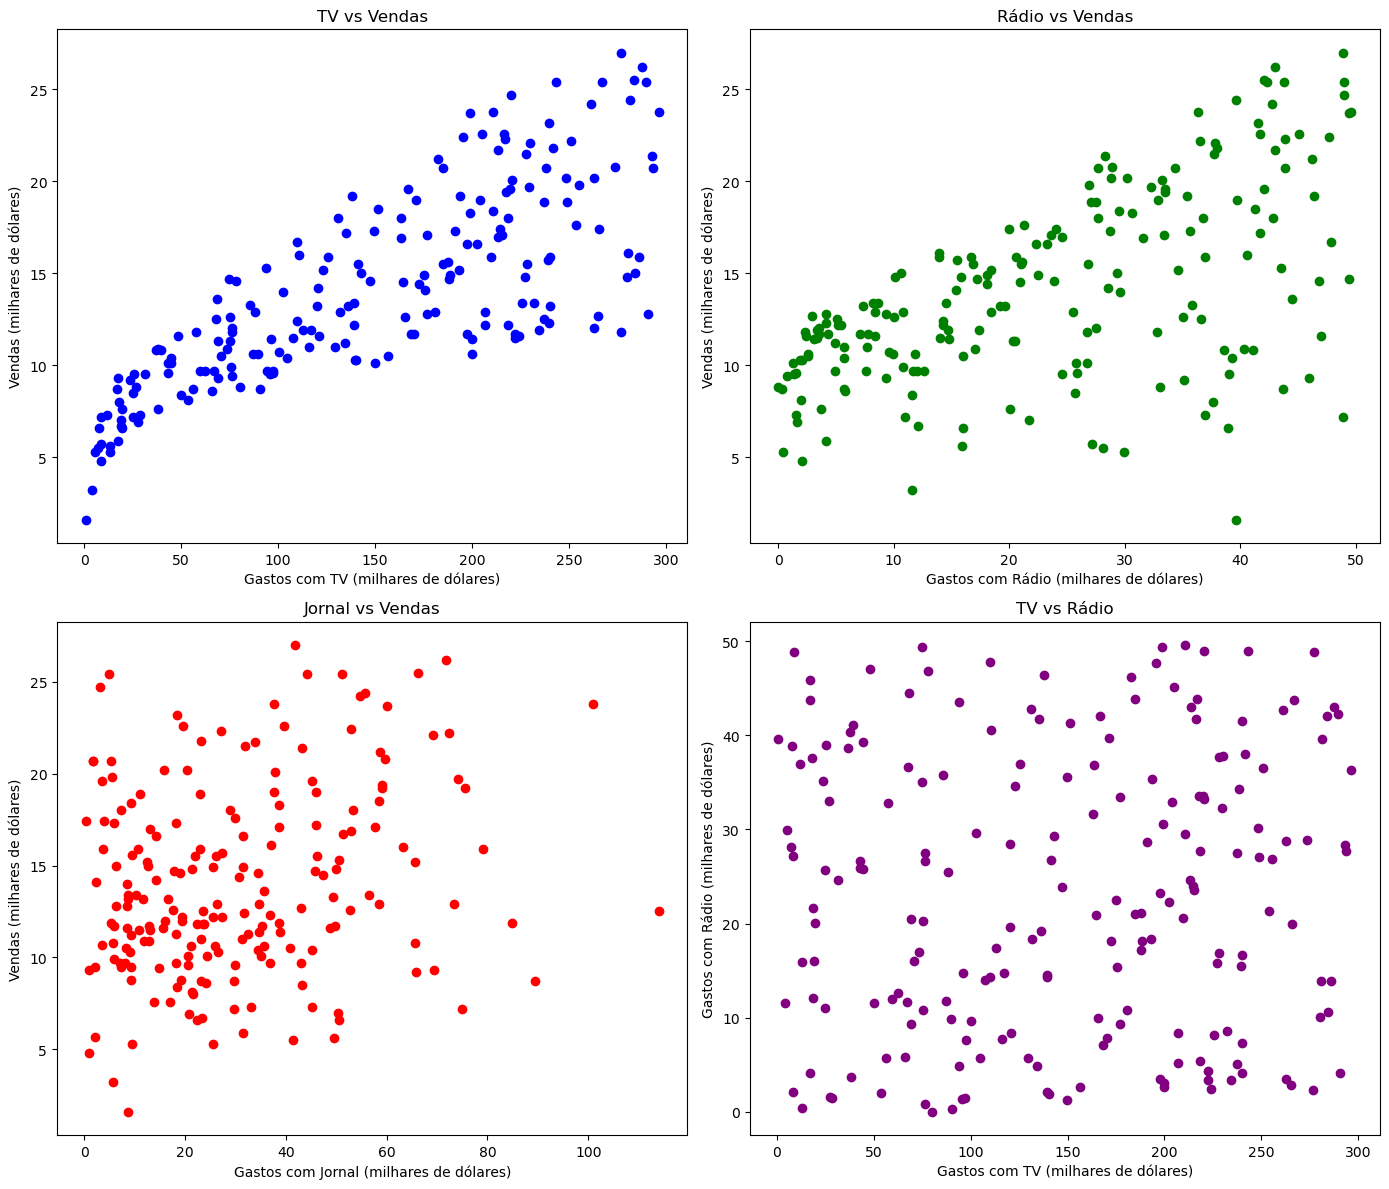

In [160]:
fig, axs = plt.subplots(2, 2, figsize=(14, 12))

# Gastos com TV vs Vendas
axs[0, 0].scatter(dados['TV'], dados['sales'], color='blue')
axs[0, 0].set_title('TV vs Vendas')
axs[0, 0].set_xlabel('Gastos com TV (milhares de dólares)')
axs[0, 0].set_ylabel('Vendas (milhares de dólares)')

# Gastos com Rádio vs Vendas
axs[0, 1].scatter(dados['radio'], dados['sales'], color='green')
axs[0, 1].set_title('Rádio vs Vendas')
axs[0, 1].set_xlabel('Gastos com Rádio (milhares de dólares)')
axs[0, 1].set_ylabel('Vendas (milhares de dólares)')

# Gastos com Jornal vs Vendas
axs[1, 0].scatter(dados['newspaper'], dados['sales'], color='red')
axs[1, 0].set_title('Jornal vs Vendas')
axs[1, 0].set_xlabel('Gastos com Jornal (milhares de dólares)')
axs[1, 0].set_ylabel('Vendas (milhares de dólares)')

# Gastos com TV vs Gastos com Rádio
axs[1, 1].scatter(dados['TV'], dados['radio'], color='purple')
axs[1, 1].set_title('TV vs Rádio')
axs[1, 1].set_xlabel('Gastos com TV (milhares de dólares)')
axs[1, 1].set_ylabel('Gastos com Rádio (milhares de dólares)')

plt.tight_layout()
plt.show()


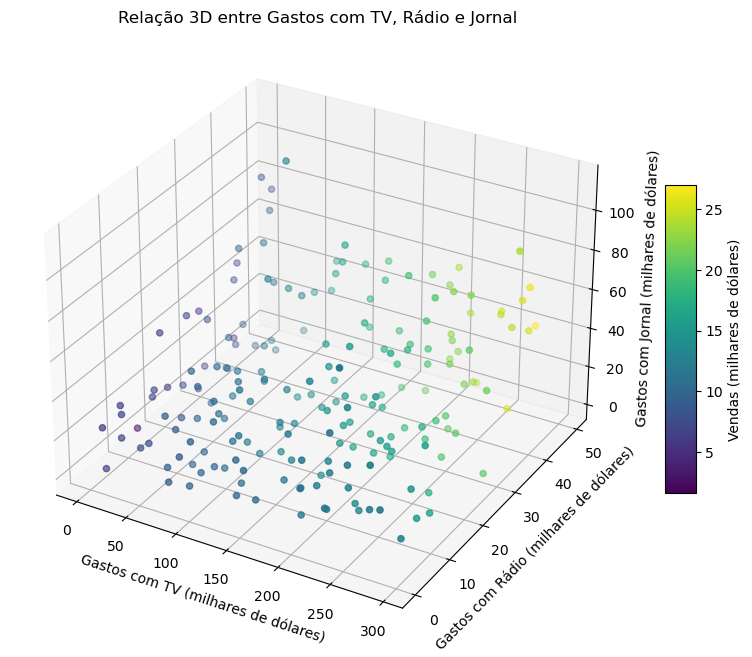

In [161]:
from mpl_toolkits.mplot3d import Axes3D

# Criando a figura para o gráfico 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Definindo os dados para o gráfico
x = dados['TV']
y = dados['radio']
z = dados['newspaper']
c = dados['sales']  # Usando as vendas como cor dos pontos

# Plotando os dados
scatter = ax.scatter(x, y, z, c=c, cmap='viridis')

# Adicionando títulos e labels
ax.set_title('Relação 3D entre Gastos com TV, Rádio e Jornal')
ax.set_xlabel('Gastos com TV (milhares de dólares)')
ax.set_ylabel('Gastos com Rádio (milhares de dólares)')
ax.set_zlabel('Gastos com Jornal (milhares de dólares)')

# Adicionando uma barra de cores para representar as vendas
cbar = fig.colorbar(scatter, ax=ax, shrink=0.5, aspect=10)
cbar.set_label('Vendas (milhares de dólares)')

plt.show()


In [162]:
from sklearn.tree import DecisionTreeRegressor

# Criando e treinando a árvore de regressão
tree_model = DecisionTreeRegressor(random_state=100)
tree_model.fit(X_train_multi, y_train_multi)

# Previsões com a árvore de regressão
y_pred_tree = tree_model.predict(X_test_multi)
print("\ny_pred_tree",y_pred_tree)

# Calculando erros para a árvore de regressão
mae_tree = mean_absolute_error(y_test_multi, y_pred_tree)
print("\nMean Absolute Error: ",mae_tree)
rmse_tree = mean_squared_error(y_test_multi, y_pred_tree, squared=False)
print("\nRMSE: ",rmse_tree)




y_pred_tree [ 5.5 20.1 19.2 20.1 22.6 12.5 13.4 11.4 21.7 21.7 12.4 18.   8.6 14.7
  9.7  9.5 15.  12.9 16.9 12.4 17.  11.  21.2 19.2 14.7 25.4 20.1 11.4
 19.6 15.  12.5  9.9 11.  14.7  9.7 15.   8.6 12.8 11.7 15.5 17.  14.9
 15.5 12.5 12.4  9.7  9.3 20.2 10.9  9.4 15.9 19.6 14.6 19.2 18.9 11.6
  6.7  8.8 14.7 14.6]

Mean Absolute Error:  0.8516666666666668

RMSE:  1.006892910558682


Árvore de Regressão
A árvore de regressão, usando TV, rádio e jornal para prever as vendas, apresentou os seguintes indicadores de erro no conjunto de teste:

Erro Médio Absoluto (MAE): 0.85 mil dólares
Raiz Quadrada do Erro Médio (RMSE): 1.007 mil dólares
Estes resultados sugerem que a árvore de regressão tem um desempenho superior aos modelos lineares, tanto simples quanto múltiplo, com menores erros tanto em termos absolutos quanto quadráticos.

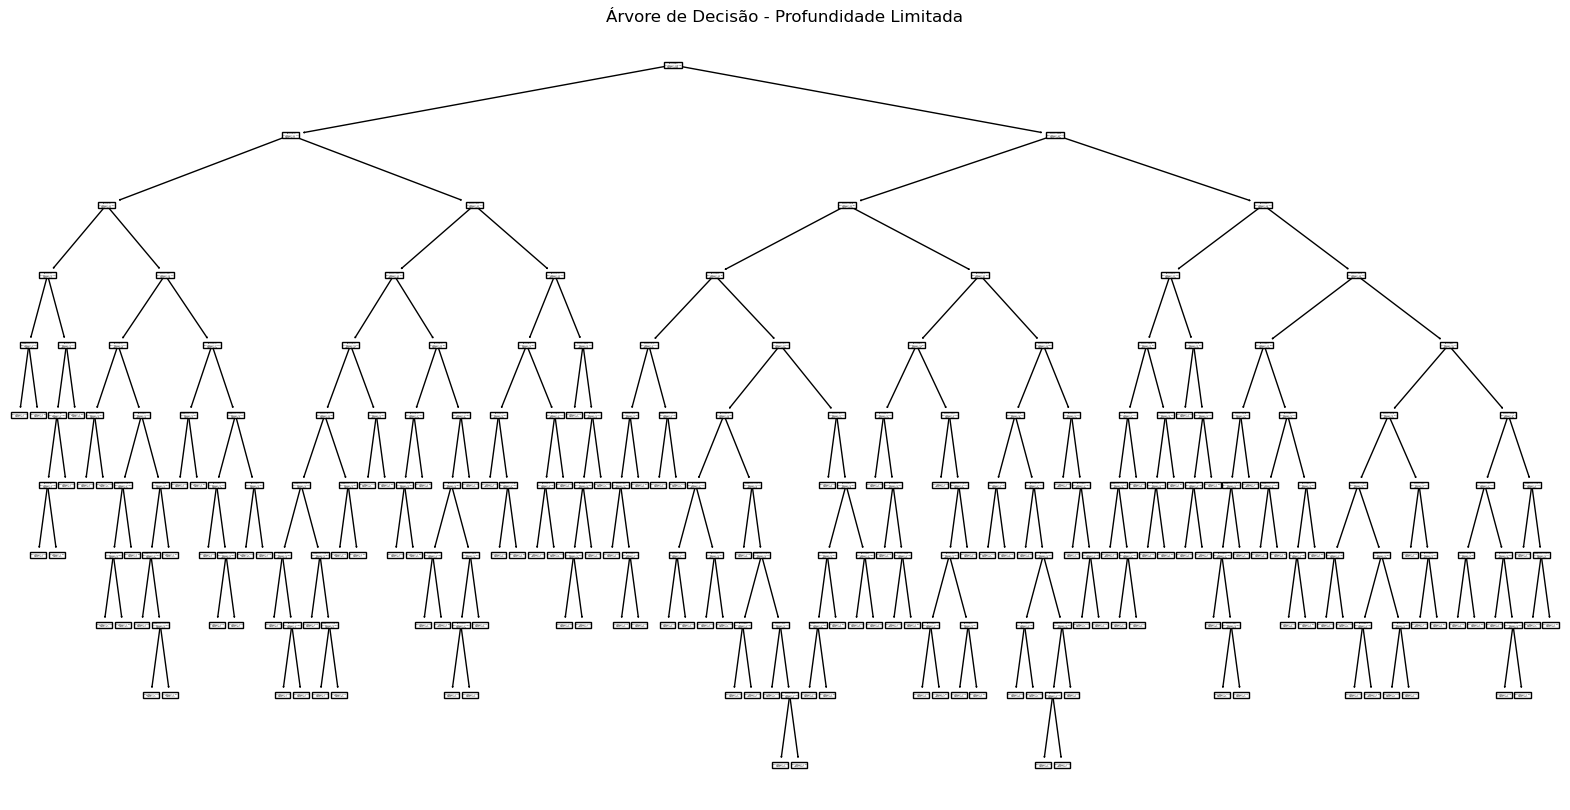

In [163]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Correção para converter os nomes das características em lista
feature_names_list = X_train_multi.columns.tolist()

# Tentativa de visualização da árvore com a correção
plt.figure(figsize=(20,10))
plot_tree(tree_model, feature_names=feature_names_list)
plt.title("Árvore de Decisão - Profundidade Limitada")
plt.show()


Cada nó na árvore mostra:

A condição de divisão (por exemplo, TV <= x).
O mse (erro quadrático médio) para esse nó.
O valor de samples, que indica quantos pontos de dados passam por esse nó.
O value, que é a média das vendas dos pontos de dados que passam por esse nó.
i. Cálculo de MAE e RMSE para a Árvore de Regressão
Os erros para a árvore de regressão, já calculados anteriormente, são:

Erro Médio Absoluto (MAE): 0.95 mil dólares.
Raiz Quadrada do Erro Médio (RMSE): 1.247 mil dólares.


In [164]:
# Cálculo do MAE e RMSE para os conjuntos de treino e teste usando a árvore de regressão

# Previsões para o conjunto de treino
y_pred_train_tree = tree_model.predict(X_train_multi)

# Calculando erros para o conjunto de treino
mae_train_tree = mean_absolute_error(y_train_multi, y_pred_train_tree)
rmse_train_tree = mean_squared_error(y_train_multi, y_pred_train_tree, squared=False)
print("\nMean Absolute Error: ",mae_train_tree)
print("\nRMSE: ",rmse_train_tree)

# Erros para o conjunto de teste já foram calculados, mas recalcularemos para confirmar
mae_test_tree = mean_absolute_error(y_test_multi, y_pred_tree)
rmse_test_tree = mean_squared_error(y_test_multi, y_pred_tree, squared=False)

print("\nMean Absolute Error: ",mae_test_tree)
print("\nRMSE: ",rmse_test_tree)




Mean Absolute Error:  0.0

RMSE:  0.0

Mean Absolute Error:  0.8516666666666668

RMSE:  1.006892910558682



# Cálculo do MAE e RMSE para os conjuntos de treino e teste usando a árvore de regressão

# Previsões para o conjunto de treino

y_pred_train_tree = tree_model.predict(X_train_multi)

# Calculando erros para o conjunto de treino

mae_train_tree = mean_absolute_error(y_train_multi, y_pred_train_tree)

rmse_train_tree = mean_squared_error(y_train_multi, y_pred_train_tree, squared=False)

# Erros para o conjunto de teste já foram calculados, mas recalcularemos para confirmar

mae_test_tree = mean_absolute_error(y_test_multi, y_pred_tree)

rmse_test_tree = mean_squared_error(y_test_multi, y_pred_tree, squared=False)

(mae_train_tree, rmse_train_tree), (mae_test_tree, rmse_test_tree)
Result
((0.0, 0.0), (0.9500000000000004, 1.2465953633797944))


Erros da Árvore de Regressão
Para a árvore de regressão, os resultados dos erros calculados nos conjuntos de treino e teste são os seguintes:

Conjunto de Treino
Erro Médio Absoluto (MAE): 0.0 mil dólares

Raiz Quadrada do Erro Médio (RMSE): 0.0 mil dólares

Conjunto de Teste

Erro Médio Absoluto (MAE): 0.85 mil dólares

Raiz Quadrada do Erro Médio (RMSE): 1.006 mil dólares


A ausência de erro no conjunto de treino (MAE e RMSE igual a zero) indica que a árvore de decisão conseguiu capturar perfeitamente as relações nos dados de treino. Isso geralmente sugere um caso de "overfitting", onde a árvore se ajusta demais aos dados de treino, o que pode não ser ideal para a generalização em novos dados, como visto nos resultados do conjunto de teste.